In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data = pd.read_csv('case_study_marketing_20210201.csv')
data.shape

(1275185, 19)

In [3]:
data.drop_duplicates(inplace=True)
data.shape

(1065784, 19)

In [4]:
data.isnull().sum().sort_values(ascending=False).head(5)

bookings            3130
booking_amount      3130
users_engagement       0
pub_device             0
market_code            0
dtype: int64

In [5]:
data.dropna(axis=0,inplace=True)
data.shape

(1062654, 19)

In [6]:
no_ads = data.shape[0]
total_impressions = data['impressions'].sum()
impression_click = data[(data['impressions']>0) & (data['clickins']>0)].shape[0]
impression_no_click = data[(data['impressions']>0) & (data['clickins']==0)].shape[0]
click_n_book = data[(data['impressions']>0) & (data['clickins']>0) & (data['bookings']>0)].shape[0]
click_nobook = data[(data['impressions']>0) & (data['clickins']>0) & (data['bookings']==0)].shape[0]

print("Total Ads in Oct-Mar " + str(no_ads))
print("Total Ads shown in Oct-Mar " + str(total_impressions))
print("Total Ads that were clicked " + str(impression_click))
print("Total Ads that were clicked and led to a booking " + str(click_n_book))
print("Avg Click through rate through Ads shown " + str(impression_click/total_impressions))
print("Avg Booking Conversion rate through Ads shown " + str(click_n_book/total_impressions))

Total Ads in Oct-Mar 1062654
Total Ads shown in Oct-Mar 8474379
Total Ads that were clicked 142622
Total Ads that were clicked and led to a booking 1790
Avg Click through rate through Ads shown 0.016829787763799564
Avg Booking Conversion rate through Ads shown 0.00021122491689361546


In [7]:
data[data['impressions']==0].replacement_type_name.value_counts().sort_values(ascending=True)

CountryOnly      5247
PoiOnly          5901
HT               7939
RegionOnly       8854
Country         23663
CityOnly        70610
Region          70741
City           592376
Name: replacement_type_name, dtype: int64

In [8]:
df = data[data['impressions']>0].copy()
df.shape

(277323, 19)

In [9]:
df['pub_device'].value_counts()

desktop    141167
phone      111413
tablet      24743
Name: pub_device, dtype: int64

In [10]:
df.groupby('pub_device').mean()

,ymd,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,match_type,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
pub_device,,,,,,,,,,,,,,
desktop,2.020347e+07,521.463827,5.121867e+09,6.266894e+14,3.953062e+13,1.315548,32.821984,2.588480,37.500266,0.644287,0.007998,26.333109,0.021289,266.296032
phone,2.020333e+07,381.393347,9.188614e+09,1.623831e+14,1.039616e+13,1.161767,31.679992,2.608879,33.309048,0.646074,0.007486,23.438611,0.019199,266.350991
tablet,2.020333e+07,406.733824,7.904744e+09,3.296076e+14,2.081468e+13,1.253688,12.586792,0.760458,17.625308,0.188296,0.002546,12.097118,0.009916,265.397163


In [11]:
df.replacement_type_name.value_counts().sort_values(ascending=True)
##Except in Item and POI Category, Ads belonging to other categories are not displayed most times.

PoiOnly           521
CountryOnly       705
HT               1026
RegionOnly       1151
Country          2017
Region           5886
CityOnly         7593
Poi             39221
City            47890
Item           171313
Name: replacement_type_name, dtype: int64

In [12]:
##df.to_excel("shown_ads.xlsx")

In [13]:
#Country-Wise Datasets 

In [14]:
df_country_wise = df.groupby("market_code")['impressions',
       'clickins', 'cost', 'clickout', 'bookings', 'clickout_rev',
       'booking_amount', 'users_engagement'].sum()

<ipython-input-14-4f42f9342e4b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_country_wise = df.groupby("market_code")['impressions',


In [15]:
df.market_code.value_counts()

DE    125902
BR     65706
UK     53310
AU     24232
CA      8173
Name: market_code, dtype: int64

In [16]:
#revenue/cost for each market
def calc_rev_cost(countries):
    for i in range(5):
        print(countries[i] + " " + str(df_country_wise.iloc[i][5]/df_country_wise.iloc[i][2]))

In [17]:
df_country_wise

,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
market_code,,,,,,,,
AU,940170,74551,2643375,29723,925.0,2281692,2339.316194,6480465
BR,4162998,410503,2446950,96653,666.0,1628627,1016.838303,17522732
CA,232249,15307,273687,6313,180.0,368897,439.216712,2144033
DE,1991199,112985,2797243,20817,120.0,1524480,943.660000,33527712
UK,1147763,61541,1279709,14086,135.0,824355,650.674524,14158955


In [18]:
#revenue/cost country-wise
calc_rev_cost(['AU','BR','CA','DE','UK'])

AU 0.8631737835153922
BR 0.6655742863564846
CA 1.3478791466163902
DE 0.5449937670770827
UK 0.6441737926356695


In [19]:
#Click through rate = (no. of clickins)/(no. of impressions)  for each market
def ctr(countries):
    for i in range(5):
        print(countries[i] + " " + str(df_country_wise.iloc[i][1]/df_country_wise.iloc[i][0]))

ctr(['AU','BR','CA','DE','UK'])

AU 0.07929523384068839
BR 0.09860754196855247
CA 0.06590771112039234
DE 0.05674219402480616
UK 0.053618212122188987


In [20]:
#conversion rate = (no. of bookings)/(no. of clickins)  for each market
def conversion_rate(countries):
    for i in range(5):
        print(countries[i] + " " + str(df_country_wise.iloc[i][4]/df_country_wise.iloc[i][1]))

conversion_rate(['AU','BR','CA','DE','UK'])

AU 0.012407613579965393
BR 0.001622399836298395
CA 0.01175932579865421
DE 0.0010620878877727132
UK 0.002193659511545149


In [21]:
#bookings to impression ratio for each market

def bookings_to_impression(countries):
    for i in range(5):
        print(countries[i] + " " + str(df_country_wise.iloc[i][4]/df_country_wise.iloc[i][0]))

bookings_to_impression(['AU','BR','CA','DE','UK'])

AU 0.0009838646202282567
BR 0.00015998085994756663
CA 0.0007750302477082786
DE 6.026519699939584e-05
UK 0.00011762010101388527


In [22]:
# performance market wise 

def performance(countries):
    for i in range(5):
        print(countries[i] + " " + str((df_country_wise.iloc[i][4]/df_country_wise.iloc[i][0])*(df_country_wise.iloc[i][5]/df_country_wise.iloc[i][2]) ))

performance(['AU','BR','CA','DE','UK'])


AU 0.0008492461467093588
BR 0.00010647914669029837
CA 0.001044647108882924
DE 3.284415673634324e-05
UK 7.576778656030504e-05


In [23]:
## CA is the best performing market

In [24]:
#global and market average trivago revenue per clickin

In [25]:
#global revenue per clickin 
df['clickout_rev'].sum()/df['clickins'].sum()

9.82097891943392

In [26]:
#market average revenue per clickin
def rev_per_click(countries):
    for i in range(5):
        print(countries[i] + " " + str(df_country_wise.iloc[i][5]/df_country_wise.iloc[i][1]))

rev_per_click(['AU','BR','CA','DE','UK'])

AU 30.60578664270097
BR 3.9673936609476668
CA 24.09988893970079
DE 13.492764526264548
UK 13.39521619733186


In [27]:
#Clickout to Booking ratios
def clickout_to_booking(countries):
    for i in range(5):
        print(countries[i] + " " + str(df_country_wise.iloc[i][3]/df_country_wise.iloc[i][4]))

clickout_to_booking(['AU','BR','CA','DE','UK'])

AU 32.13297297297297
BR 145.12462462462463
CA 35.07222222222222
DE 173.475
UK 104.34074074074074


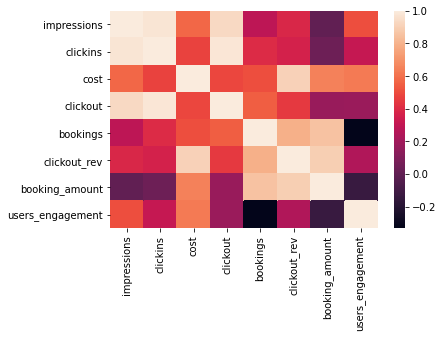

In [28]:
#Relation between Impressions and Clickouts
sns.heatmap(df_country_wise.corr())
#High correlation between clickout and impressions

In [29]:
df.groupby("market_code")['match_type'].mean()

market_code
AU    1.075603
BR    1.225246
CA    0.826991
DE    1.291838
UK    1.316714
Name: match_type, dtype: float64

In [30]:
#average price to pay for a conversion

In [31]:
df['clickout_rev'].sum()/df['cost'].sum()
#Currently the ROAS is 70.20%

0.7020523539757169

In [32]:
df['clickout_rev'].sum()

6628051

In [33]:
df['cost'].sum()

9440964

In [34]:
print("For an 125% ROAS, the sum of costs should be " + str((df['clickout_rev'].sum())*(100/125)) )

For an 125% ROAS, the sum of costs should be 5302440.800000001


In [35]:
print("Average price to pay for a conversion " + str(5302440.800000001/df.shape[0]) )

Average price to pay for a conversion 19.12009029182578


In [36]:
#Keyword Category wise statistics

In [37]:
df_category_wise = df.groupby("replacement_type_name")['impressions','clickins', 'cost', 'clickout', 'bookings', 'clickout_rev','booking_amount', 'users_engagement'].sum()

<ipython-input-37-691690528019>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df_category_wise = df.groupby("replacement_type_name")['impressions','clickins', 'cost', 'clickout', 'bookings', 'clickout_rev','booking_amount', 'users_engagement'].sum()


In [38]:
df_category_wise.index

Index(['City', 'CityOnly', 'Country', 'CountryOnly', 'HT', 'Item', 'Poi',
       'PoiOnly', 'Region', 'RegionOnly'],
      dtype='object', name='replacement_type_name')

In [39]:
df_category_wise

,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
replacement_type_name,,,,,,,,
City,246507,18946,277832,4846,58.0,200763,178.224346,12392667
CityOnly,93415,7317,112123,1818,27.0,77139,65.863937,2032590
Country,11306,652,13408,148,0.0,8536,0.000000,521507
CountryOnly,9975,711,12278,141,0.0,6750,0.000000,197679
HT,28571,2258,31281,549,5.0,21077,23.569185,267939
Item,6279244,498614,6537461,119817,1263.0,4430114,3400.058539,45867637
Poi,1753017,142661,2395357,39384,657.0,1842805,1671.758468,10557074
PoiOnly,6919,642,5216,139,0.0,3221,0.000000,143406
Region,30455,2112,37181,519,10.0,24963,33.013132,1544622


In [40]:
def calc_rev_cost2(categories):
    for i in range(10):
        print(categories[i] + "         " + str(df_category_wise.iloc[i][5]/df_category_wise.iloc[i][2]))

In [41]:
categories = ['City', 'CityOnly', 'Country', 'CountryOnly', 'HT', 'Item', 'Poi','PoiOnly', 'Region', 'RegionOnly']

In [42]:
calc_rev_cost2(categories)

City         0.7226057473581157
CityOnly         0.6879855159066383
Country         0.6366348448687351
CountryOnly         0.5497638051799968
HT         0.6737955947699882
Item         0.6776505435367033
Poi         0.7693237375472634
PoiOnly         0.6175230061349694
Region         0.6713913020090907
RegionOnly         0.6736601689063579


In [43]:
#Bidding Algorithn for Oct-Nov

In [44]:
#df[(df['market_code']=='AU') & (df['ymd']<20201001)].to_excel('AU_sept.xlsx')

In [45]:
#df[(df['market_code']=='AU') & (df['ymd']>=20201001) & (df['ymd']<20201201)].to_excel('AU_oct_nov.xlsx')

In [46]:
AU_sept = df[(df['market_code']=='AU') & (df['ymd']<20201001)]
AU_oct_nov = df[(df['market_code']=='AU') & (df['ymd']>=20201001) & (df['ymd']<20201201)]

In [47]:
AU_sept.describe()

,ymd,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,match_type,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
count,9.838000e+03,9838.000000,9.838000e+03,9.838000e+03,9.838000e+03,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000,9838.000000
mean,2.020091e+07,654.495426,4.982061e+09,3.021849e+14,1.973985e+13,0.793352,12.655011,0.902318,30.653893,0.355662,0.011994,25.100630,0.030570,261.849360
std,6.963604e+00,371.869698,5.399044e+09,5.253641e+14,3.322475e+13,0.924456,53.092540,3.968811,137.283662,1.597324,0.138459,110.293511,0.360013,169.821305
min,2.020090e+07,391.000000,1.361523e+08,2.532901e+09,1.014277e+07,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020091e+07,391.000000,2.144440e+08,2.645393e+10,2.325807e+09,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000
50%,2.020091e+07,391.000000,3.677443e+08,1.128581e+11,1.163794e+11,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,248.000000
75%,2.020092e+07,1127.000000,1.117366e+10,1.151796e+11,7.545435e+13,2.000000,10.000000,1.000000,33.000000,0.000000,0.000000,0.000000,0.000000,374.000000
max,2.020093e+07,2475.000000,1.118065e+10,1.223757e+15,7.648514e+13,2.000000,2501.000000,193.000000,6999.000000,72.000000,5.000000,4972.000000,14.253441,1016.000000


In [48]:
AU_oct_nov.describe()

,ymd,account_id,pub_campaign_id,pub_adgroup_id,pub_keyword_id,match_type,impressions,clickins,cost,clickout,bookings,clickout_rev,booking_amount,users_engagement
count,5.974000e+03,5974.000000,5.974000e+03,5.974000e+03,5.974000e+03,5974.000000,5974.00000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000,5974.000000
mean,2.020106e+07,666.679946,6.862072e+09,4.416066e+14,2.776402e+13,1.238868,60.63224,5.592233,208.794443,2.231503,0.068966,188.960161,0.174575,272.441078
std,5.116117e+01,360.201509,5.301109e+09,5.846051e+14,3.648081e+13,0.962040,235.03339,21.943227,821.878581,8.785641,0.400399,728.358685,1.029037,193.164000
min,2.020100e+07,391.000000,1.361524e+08,2.532925e+09,1.010479e+07,0.000000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.020101e+07,391.000000,3.677442e+08,1.124756e+11,2.458794e+10,0.000000,20.00000,1.000000,38.000000,0.000000,0.000000,0.000000,0.000000,116.000000
50%,2.020103e+07,391.000000,1.117366e+10,1.124761e+11,3.189941e+11,2.000000,23.00000,3.000000,102.000000,1.000000,0.000000,85.000000,0.000000,245.000000
75%,2.020111e+07,1127.000000,1.118065e+10,1.212762e+15,7.579794e+13,2.000000,47.00000,5.000000,183.750000,2.000000,0.000000,181.000000,0.000000,389.000000
max,2.020113e+07,2475.000000,1.118065e+10,1.223757e+15,7.648514e+13,2.000000,10166.00000,949.000000,35916.000000,380.000000,16.000000,33221.000000,39.410526,1181.000000


In [49]:
AU_sept[['impressions','clickins', 'cost', 'clickout', 'bookings', 'clickout_rev','booking_amount', 'users_engagement']].sum().to_frame()

,0
impressions,1.245000e+05
clickins,8.877000e+03
cost,3.015730e+05
clickout,3.499000e+03
bookings,1.180000e+02
clickout_rev,2.469400e+05
booking_amount,3.007496e+02
users_engagement,2.576074e+06


In [50]:
AU_oct_nov[['impressions','clickins', 'cost', 'clickout', 'bookings', 'clickout_rev','booking_amount', 'users_engagement']].sum().to_frame()

,0
impressions,3.622170e+05
clickins,3.340800e+04
cost,1.247338e+06
clickout,1.333100e+04
bookings,4.120000e+02
clickout_rev,1.128848e+06
booking_amount,1.042912e+03
users_engagement,1.627563e+06
